### Plot the number of MAGs for various quality

Near complete: 90% completeness and 5% contamination\
Higher quality: 70% completeness and 10% contamination\
Medium quality: 50% completeness and 10% contamination

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/performance_results.csv', header=0, sep=',')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

    

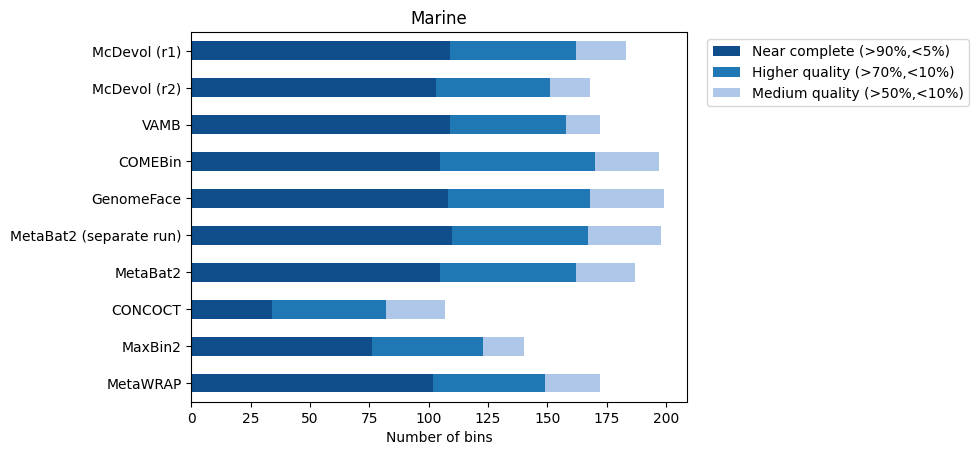

In [179]:
# Pooled assembly
ma_pooled = mags_counts.loc[mags_counts['Dataset']=='marine pooled']

plot_data = ma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('pooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


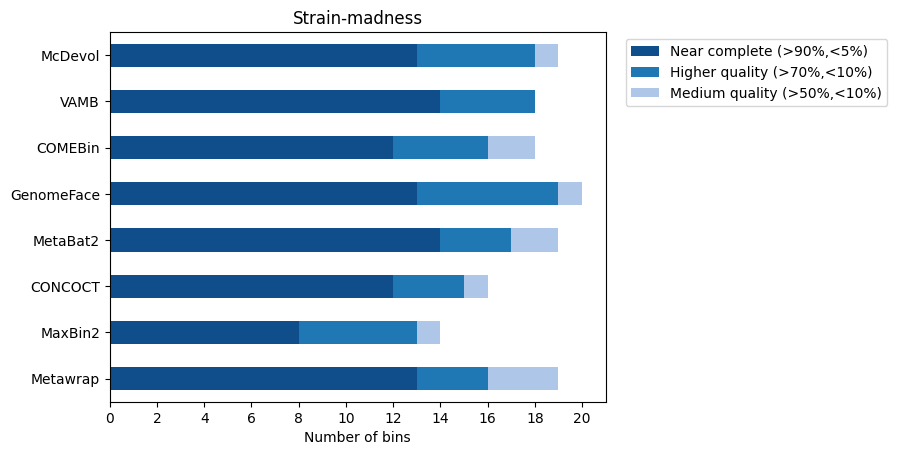

In [177]:

ss_pooled = mags_counts.loc[mags_counts['Dataset']=='strain pooled']

plot_data = ss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.xticks(range(0,22,2))
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('pooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

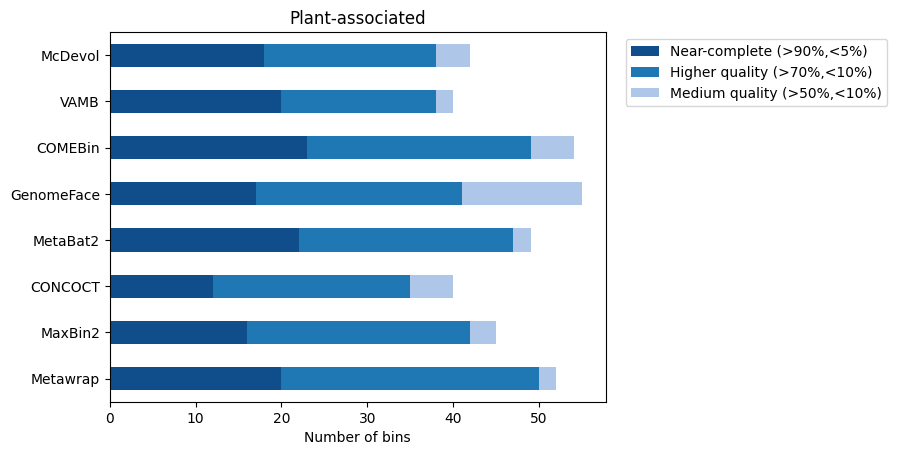

In [176]:
pl_pooled = mags_counts.loc[mags_counts['Dataset']=='plant pooled']

plot_data = pl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.xlabel('Number of bins')
plt.legend(['Near-complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.ylabel('')
plt.savefig('pooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

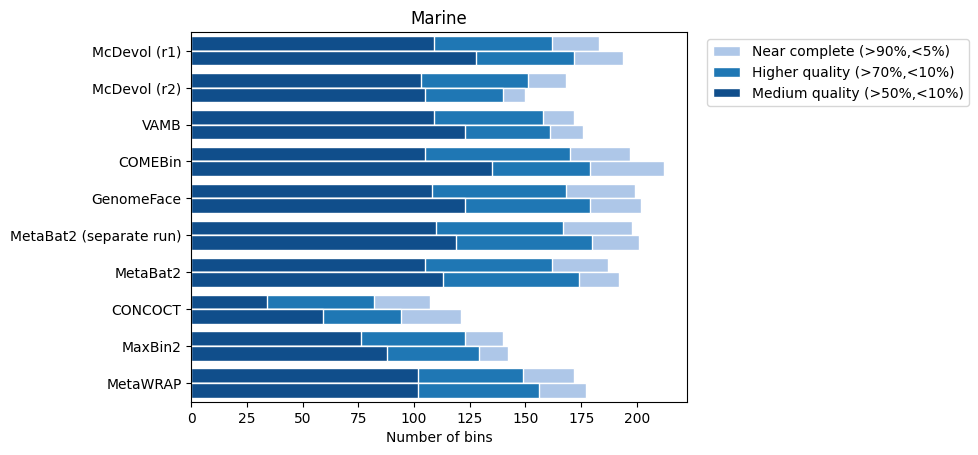

In [167]:
# reassembly
# link: https://stackoverflow.com/questions/59922701/how-can-i-group-a-stacked-bar-chart
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/performance_results.csv', header=0, sep=',')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

mags_counts_ma = mags_counts.loc[mags_counts['Dataset'].str.contains('marine pooled|marine reassembly')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order, level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

fig, ax = plt.subplots()
# (mags_counts_maplot['Near-complete (90%-5%)']+mags_counts_maplot['Higher']+mags_counts_maplot['Medium']).plot(kind='barh', color=[colors[2], colors[2]], width= 0.6, ax=ax)
# (mags_counts_maplot['Near-complete (90%-5%)']+mags_counts_maplot['Higher']).plot(kind='barh', color=[colors[1], colors[1]],width= 0.6, ax=ax)
# (mags_counts_maplot['Near-complete (90%-5%)']).plot(kind='barh', color=[colors[0], colors[0]], width= 0.6,ax=ax)

# plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
# plt.title('Marine')
# plt.xlabel('Number of bins')
# plt.ylabel('')
# plt.savefig('pooled_reaassembly_marine.png', dpi=600, format='png', bbox_inches='tight')

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "marine pooled"
(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "marine reassembly" with shifted positions
(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly'] +
 mags_counts_maplot['Higher']['marine reassembly'] +
 mags_counts_maplot['Medium']['marine reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly'] +
 mags_counts_maplot['Higher']['marine reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 9.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('pooled_reaassembly_marine.png', dpi=600, format='png', bbox_inches='tight')

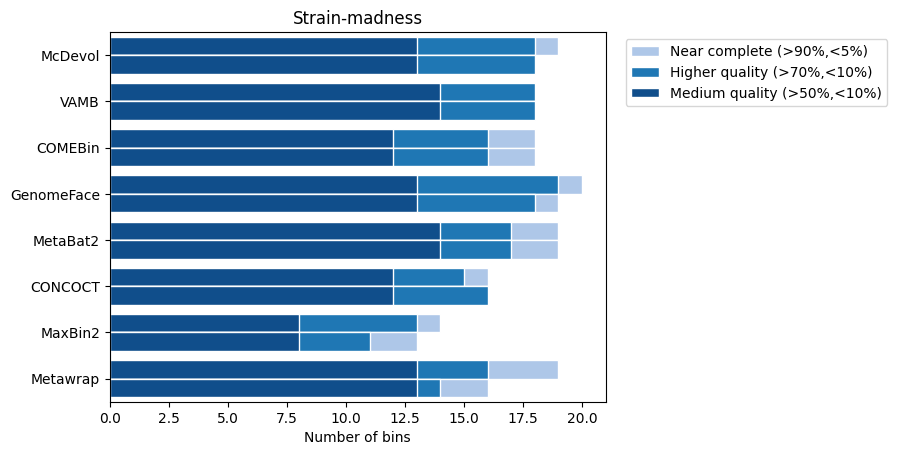

In [172]:
# strain-madness
mags_counts_ss = mags_counts.loc[mags_counts['Dataset'].str.contains('strain pooled|strain reassembly')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order, level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

fig, ax = plt.subplots()
# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "strain pooled"
(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "strain reassembly" with shifted positions
(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly'] +
 mags_counts_ssplot['Higher']['strain reassembly'] +
 mags_counts_ssplot['Medium']['strain reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly'] +
 mags_counts_ssplot['Higher']['strain reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 7.5)

plt.savefig('pooled_reaassembly_strain.png', dpi=600, format='png', bbox_inches='tight')

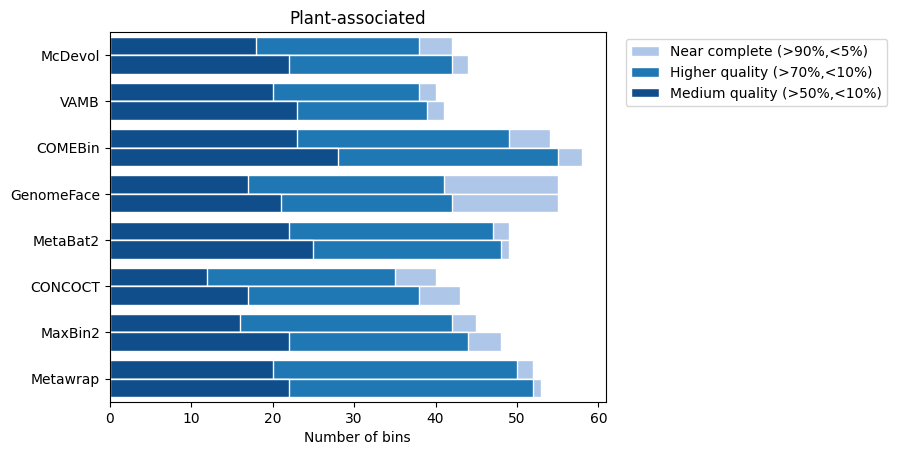

In [174]:
# plant-associated
mags_counts_pl = mags_counts.loc[mags_counts['Dataset'].str.contains('plant pooled|plant reassembly')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order, level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

fig, ax = plt.subplots()
# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "plant pooled"
(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "plant reassembly" with shifted positions
(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly'] +
 mags_counts_plplot['Higher']['plant reassembly'] +
 mags_counts_plplot['Medium']['plant reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly'] +
 mags_counts_plplot['Higher']['plant reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 7.5)

plt.savefig('pooled_reaassembly_plant.png', dpi=600, format='png', bbox_inches='tight')